# 1. Unsupervised Learning

In [1]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 1. Generating the data

First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$. Since you generated the data, you already know which sample comes from which class.
  Run the cell in the IPython notebook to generate the data.

In [2]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape (x for first class and circles for second class):

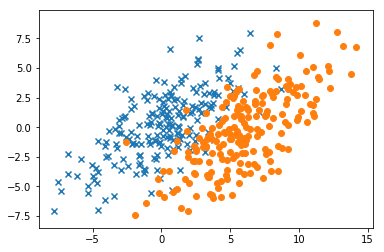

In [3]:
# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
plt.scatter(xy_class1[:,0], xy_class1[:,1], marker='x') # first class, x shape
plt.scatter(xy_class2[:,0], xy_class2[:,1], marker="o") # second class, circle shape

## 2. Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. Implement the k-means algorithm for this problem.
  Write two functions: `km_assignment_step`, and `km_refitting_step` as given in the lecture (Here, `km_` means k-means).
  Identify the correct arguments, and the order to run them. Initialize the algorithm with
  $$
    \hat\mu_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat\mu_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the cost vs. the number of iterations. Report your misclassification error.

In [4]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.sum(np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R))
    return J

In [5]:
# TODO: K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    
    # Fill this in:
    N, D = data.shape[0], data.shape[1]
    K = Mu.shape[1]
    r = np.zeros((N,K))
    for k in range(K):
         r[:, k] = np.linalg.norm(Mu[:,k] - data, axis=1)
    arg_min = np.argmin(r, axis=1)
    # argmax/argmin along dimension 1
    R_new = np.zeros((N,K))
    R_new[range(N), arg_min]= 1
    # R_new[..., ...] = 1 # Assign to 1
    return R_new

In [6]:
# TODO: K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape[0], data.shape[1]
    K = R.shape[1]
    
    Mu_new = np.zeros((D,K))
    for k in range(K):
        Mu_new[:, k] = np.mean(data[R==k], 0)
    print(Mu_new.shape)
    return Mu_new

In [7]:
# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 100
class_init = np.random.binomial(1., .5, size=N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis=0)

cost_list = []
iteration_list = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
    print(it, cost(data, R, Mu))
    cost_list.append( cost(data, R, Mu))
    iteration_list.append(it)

class_1 = np.where(R[:, 0])
class_2 = np.where(R[:, 1])

(2, 2)
0 26818.098328674554
(2, 2)
1 26015.89518146874
(2, 2)
2 26015.89518146874
(2, 2)
3 26015.89518146874
(2, 2)
4 26015.89518146874
(2, 2)
5 26015.89518146874
(2, 2)
6 26015.89518146874
(2, 2)
7 26015.89518146874
(2, 2)
8 26015.89518146874
(2, 2)
9 26015.89518146874
(2, 2)
10 26015.89518146874
(2, 2)
11 26015.89518146874
(2, 2)
12 26015.89518146874
(2, 2)
13 26015.89518146874
(2, 2)
14 26015.89518146874
(2, 2)
15 26015.89518146874
(2, 2)
16 26015.89518146874
(2, 2)
17 26015.89518146874
(2, 2)
18 26015.89518146874
(2, 2)
19 26015.89518146874
(2, 2)
20 26015.89518146874
(2, 2)
21 26015.89518146874
(2, 2)
22 26015.89518146874
(2, 2)
23 26015.89518146874
(2, 2)
24 26015.89518146874
(2, 2)
25 26015.89518146874
(2, 2)
26 26015.89518146874
(2, 2)
27 26015.89518146874
(2, 2)
28 26015.89518146874
(2, 2)
29 26015.89518146874
(2, 2)
30 26015.89518146874
(2, 2)
31 26015.89518146874
(2, 2)
32 26015.89518146874
(2, 2)
33 26015.89518146874
(2, 2)
34 26015.89518146874
(2, 2)
35 26015.89518146874
(

Missclassification is 0.6825


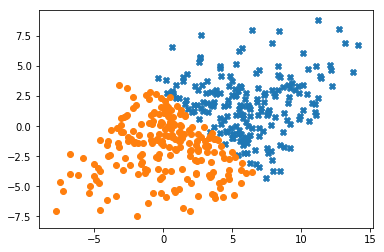

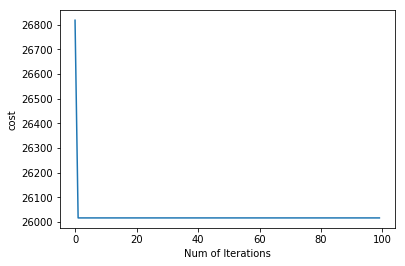

In [8]:
# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point
plt.figure(0)
plt.scatter(data[class_1, 0], data[class_1,1], marker="X") # first class, x shape
plt.scatter(data[class_2, 0], data[class_2,1], marker="o") # second class, circle 
plt.figure(1)
plt.plot(iteration_list, cost_list)
plt.xlabel("Num of Iterations")
plt.ylabel("cost")

s= 0
for i in range(N):
    if R[i, int(labels[i])] == 1:
        s+= 1
cs = s/ N
ms = 1 - cs

print("Missclassification is {}".format(ms))


# f2.show()


## 3. Implement EM algorithm for Gaussian mixtures
Next, implement the EM algorithm for Gaussian mixtures.
  Write three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step` as given in the lecture.
  Identify the correct arguments, and the order to run them.
  Initialize the algorithm with means as in Qs 2.1 k-means initialization, covariances with $\hat\Sigma_1=\hat\Sigma_2=I$,
  and $\hat\pi_1=\hat\pi_2$.

  In addition to the update equations in the lecture, for the M (Maximization) step, you also need to use this following equation to update the covariance $\Sigma_k$:
$$\hat{\mathbf{\Sigma}_k} = \frac{1}{N_k} \sum^N_{n=1} r_k^{(n)}(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})(\mathbf{x}^{(n)} - \hat{\mathbf{\mu}_k})^{\top}$$
    
  Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [9]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [10]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    # Fill this in:
    N, D = data.shape[0], data.shape[1]
    K = Mu.shape[1]
    L, T = 0., 0.
    for n in range(N):
        for k in range(K):
            T += Pi[k]* normal_density(data[n], Mu[:,k], Sigma[k])
            # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
        L += np.log(T)
    return L

In [11]:
# TODO: Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    # Fill this in:
    N, D = data.shape[0], data.shape[1]
    K = Mu.shape[1]
    Gamma = np.zeros((N,K))
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * normal_density(data[n,:], Mu[:,k], Sigma[k])
        Gamma[n, :] /= np.sum(Gamma[n, :])
    return Gamma

In [12]:
# TODO: Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    # Fill this in:
    N, D = data.shape[0], data.shape[1]
    K = Gamma.shape[1]
    Nk = np.sum(Gamma, axis=0)# Sum along first axis 
    Mu = 1./Nk * (np.dot(data.T, Gamma))
    Sigma = [np.eye(D) for i in range(K)]
    for k in range(K):
        last = data-Mu[:,k]
        middle = np.eye(N)*Gamma[:, k]
        first = last.T
        third = first @ middle @ last
        Sigma[k] = (1./Nk[k])*third
    Pi =  Nk/N
    return Mu, Sigma, Pi

In [13]:
# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

log_list = []
it_list = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    it_list.append(it)
    log_list.append(log_likelihood(data, Mu, Sigma, Pi))
    # print(it, log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but good for debugging

class_1 = np.where(Gamma[:, 0] >= .5)
class_2 = np.where(Gamma[:, 1] >= .5)

 misclassfication rate is 0.07250000000000001


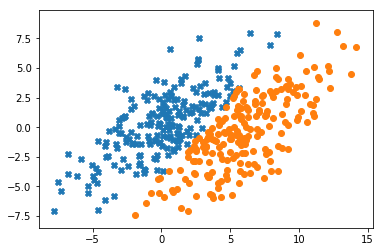

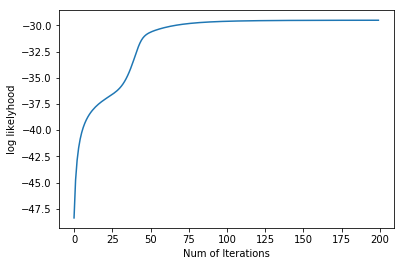

In [14]:
# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point
plt.figure(0)
plt.scatter(data[class_1, 0], data[class_1,1], marker="X") # first class, x shape
plt.scatter(data[class_2, 0], data[class_2,1], marker="o")
plt.figure(1)
# print(log_list)
plt.plot(it_list, log_list)
plt.xlabel("Num of Iterations")
plt.ylabel("log likelyhood")
s= 0
for i in class_1[0]:
    if int(labels[i]) == 0:
        s += 1
        
for j in class_2[0]:
    if int(labels[j]) == 1:
        s+= 1

cs = s/ N
ms = 1 - cs
print(" misclassfication rate is {}".format(ms))


## 4. Comment on findings + additional experiments

Comment on the results:

* Compare the performance of k-Means and EM based on the resulting cluster assignments.
* Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method?
* Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data?
 


d) i) The k-means clustering algorithm sets the cluster to be divided through a diagonal that goes from the top left to botton right, while the EM divides it through from top right to bottom left. This can be a result of K-means algorithm converging to a local minimum, which made it choose the center mean that it did. 

ii) Since k-means only runs one iteration because it converges after one, it get stuck at a local minimum and so it sets the center means at the incorrect classification. EM runs through several iterations before converging, hence why its able to classify the data better than k-means. See the figures above for further details. 

iii) Because the data is randomize, sometimes the k-means algorithm classifies properly, whereas other time it gets stuck at a local min. Depending on the data, the EM algorithm will take a while to converge; 
...

# 2. Reinforcement Learning

There are 3 files:
1. `maze.py`: defines the `MazeEnv` class, the simulation environment which the Q-learning agent will interact in.
2. `qlearning.py`: defines the `qlearn` function which you will implement, along with several helper functions. Follow the instructions in the file. 
3. `plotting_utils.py`: defines several plotting and visualization utilities. In particular, you will use `plot_steps_vs_iters`, `plot_several_steps_vs_iters`, `plot_policy_from_q`

In [11]:
from qlearning import qlearn
from maze import MazeEnv, ProbabilisticMazeEnv
from plotting_utils import plot_steps_vs_iters, plot_several_steps_vs_iters, plot_policy_from_q

## 1. Basic Q Learning experiments

(a) Run your algorithm several times on the given environment. Use the following hyperparameters:
1. Number of episodes = 200
2. Alpha ($\alpha$) learning rate = 1.0
2. Maximum number of steps per episode = 100. An episode ends when the agent reaches a goal state, or uses the maximum number of steps per episode
3. Gamma ($\gamma$) discount factor = 0.9
4. Epsilon ($\epsilon$) for $\epsilon$-greedy = 0.1 (10% of the time). Note that we should "break-ties" when the Q-values are zero for all the actions (happens initially) by essentially choosing uniformly from the action. So now you have two conditions to act randomly: for epsilon amount of the time, or if the Q values are all zero. 


In [20]:
# TODO: Fill this in
num_iters = 200
alpha =1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Instantiate the MazeEnv environment with default arguments
env = MazeEnv()

# TODO: Run Q-learning:
#(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy, init_beta=None, k_exp_sched=None):
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

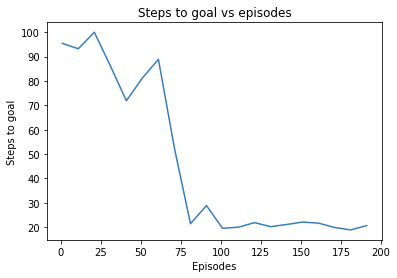

In [21]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Visualize the learned greedy policy from the Q values:

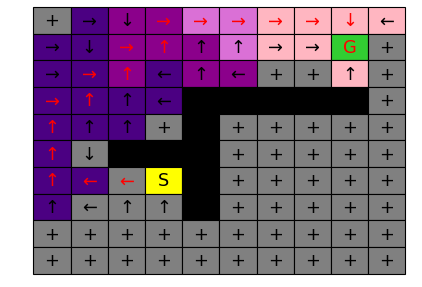

<Figure size 720x720 with 0 Axes>

In [22]:
# TODO: plot the policy from the Q value
plot_policy_from_q(q_hat,env)

(b) Run your algorithm by passing in a list of 2 goal locations: (1,8) and (5,6). Note: we are using 0-indexing, where (0,0) is top left corner. Report on the results.

In [23]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Set the goal
goal_locs = [[1,8], [5,6]]
env = MazeEnv(goals=goal_locs)

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env, num_iters, alpha, gamma, epsilon, max_steps, use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):


In [24]:
# TODO: Plot the steps vs iterations
# plot_steps_vs_iters(...)

Plot the steps to goal vs training iterations (episodes):
2.2 Results : 
The results are as followed: 
In this experiment, it was demonstrated that the algorithm converged quicker than in our first experiment when we had only the one goal. This may be due to the fact that the two goals were relatively closer to the starting position so it was easier to find the optimal Q each iteration. 

plot_steps_vs_iters(steps_vs_iters)


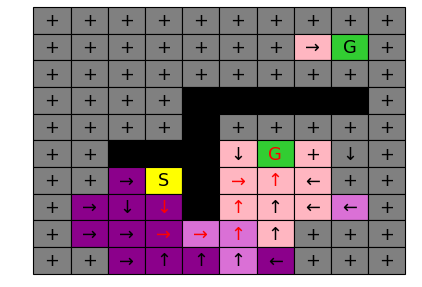

<Figure size 720x720 with 0 Axes>

In [25]:
# TODO: plot the policy from the Q values
# plot_policy_from_q(...)
plot_policy_from_q(q_hat,env)


## 2. Experiment with the exploration strategy, in the original environment

(a) Try different $\epsilon$ values in $\epsilon$-greedy exploration: We asked you to use a rate of $\epsilon$=10%, but try also 50% and 1%. Graph the results (for 3 epsilon values) and discuss the costs and benefits of higher and lower exploration rates.

In [8]:
# TODO: Fill this in (same as before)
# 
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon_list = [0.01, 0.1, 0.5]
max_steps = 100
use_softmax_policy = False


# TODO: set the epsilon lists in increasing order:
# epsilon_list = ...
env = MazeEnv()

steps_vs_iters_list = []
for epsilon in epsilon_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters,
                                   alpha, gamma, epsilon, max_steps,use_softmax_policy)

    steps_vs_iters_list.append(steps_vs_iters)

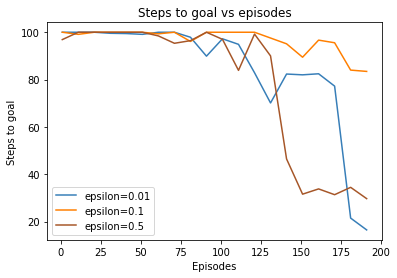

In [9]:
# TODO: Plot the results
label_list = ["epsilon={}".format(eps) for eps in epsilon_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)


2.3 Results:
The exploration rates that are smaller take longer to find the the quickest path, however will more likely find the optimal path. Whereas the exploration rates that are higher will be determine faster path after less episodes, however they may never find the optimal path to the goal (or goals)

(b) Try exploring with policy derived from **softmax of Q-values** described in the Q learning lecture. Use the values of $\beta \in \{1, 3, 6\}$ for your experiment, keeping $\beta$ fixed throughout the training.

In [12]:
# TODO: Fill this in for Static Beta with softmax of Q-values
num_iters = 200
alpha = 1.
gamma = 0.9
epsilon = 0.1
max_steps = 100

# TODO: Set the beta
beta_list = [1, 3, 6]
use_softmax_policy = True
k_exp_schedule = 0 # (float) choose k such that we have a constant beta during training

env = MazeEnv()
steps_vs_iters_list = []
for beta in beta_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters,
                                   alpha, gamma, epsilon, max_steps,use_softmax_policy, init_beta=beta, k_exp_sched=k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

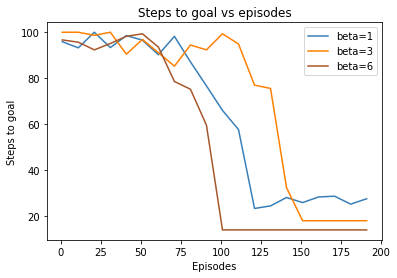

In [13]:
label_list = ["beta={}".format(beta) for beta in beta_list]
# TODO: 
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)

(c) Instead of fixing the $\beta = \beta_0$ to the initial value, we will increase the value of $\beta$ as the number of episodes $t$ increase:

$$\beta(t) = \beta_0 e^{kt}$$

That is, the $\beta$ value is fixed for a particular episode.
Run the training again for different values of $k \in \{0.05, 0.1, 0.25, 0.5\}$, keeping $\beta_0 = 1.0$. Compare the results obtained with this approach to those obtained with a static $\beta$ value.

In [14]:
# TODO: Fill this in for Dynamic Beta
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = True

# TODO: Set the beta
beta = 1.0
# use_softmax_policy = ...
k_exp_schedule_list = [0.05, 0.1, 0.25, 0.5]
env = MazeEnv()

steps_vs_iters_list = []
for k_exp_schedule in k_exp_schedule_list:
    q_hat, steps_vs_iters = qlearn(env, num_iters,
                                   alpha, gamma, epsilon, max_steps,use_softmax_policy, init_beta=beta, k_exp_sched=k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

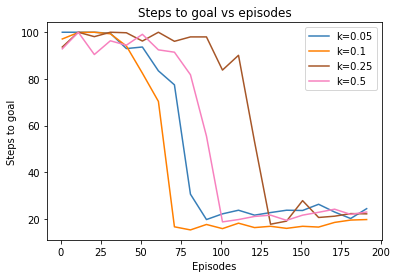

In [15]:
# TODO: Plot the steps vs iterations
label_list = ["k={}".format(k_exp_schedule) for k_exp_schedule in k_exp_schedule_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)#%% md
## 3. Stochastic Environments


Results between static and dynamic beta:
When beta is static, and is a smaller value, it will explore more paths because the penality of not finding the goal is not as severe . As we increase the value of beta and it remains static, it is focused more on finding the path to the goal, it starts to act like the greedy algorithm using episilon. Compared to when beta is dynamic, where we are able to gain some exploration steps and then switch over to exploitation where our main focus in reaching the goal. Because there is always a trade off, as k -> 0, beta becomes constant, and hence depending on the initial beta, it will begin to act like the greedy alorgithm, whereas a high k forces large paths to be explore, with less of a focus on the goal. 

(a) Make  the  environment  stochastic  (uncertain),  such  that  the  agent  only  has  a  95% chance  of  moving  in  the  chosen  direction,  and  has  a  5%  chance  of  moving  in  some random direction.

In [33]:
# TODO: Implement ProbabilisticMazeEnv in maze.py

(b) Change the learning rule to handle the non-determinism, and experiment with different probability of environment performing random action $p_{rand} \in \{0.05, 0.1, 0.25, 0.5\}$ in this new rule. How does performance vary as the environment becomes more stochastic?

Results :
As it has been shown in the previous experiments, if there is too much randomness and the algorithm is able to choose its path freely, without much penality, it is shown that it cannot converge to an optimal solutions. Furthermore, in the average case when the randomness is not such a high value, it is shown that the behaviour is pretty similar; The graphs show this similarity as they seem to have similar shapes. 

Use the same parameters as in first part, except change the alpha ($\alpha$) value to be **less than 1**, e.g. 0.5.

In [4]:
# TODO: Use the same parameters as in the first part, except change alpha
num_iters = 200
alpha = 0.5
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# Set the environment probability of random
env_p_rand_list = [0.05, 0.1, 0.25, 0.5]

steps_vs_iters_list = []
for env_p_rand in env_p_rand_list:
    # Instantiate with ProbabilisticMazeEnv
    env = ProbabilisticMazeEnv()
    env.p_rand = env_p_rand

    # Note: We will repeat for several runs of the algorithm to make the result less noisy
    avg_steps_vs_iters = np.zeros(num_iters)
    for i in range(10):
        q_hat, steps_vs_iters = qlearn(env, num_iters,
                                   alpha, gamma, epsilon, max_steps,use_softmax_policy)
        avg_steps_vs_iters += steps_vs_iters
    avg_steps_vs_iters /= 10
    steps_vs_iters_list.append(avg_steps_vs_iters)

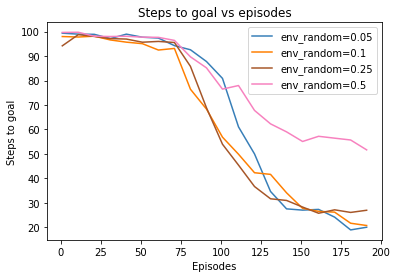

In [41]:
label_list = ["env_random={}".format(env_p_rand) for env_p_rand in env_p_rand_list]
plot_several_steps_vs_iters(steps_vs_iters_list, label_list)#%% md
# 3. Did you complete the course evaluation?

In [3]:
 #Answer: yes